<a href="https://colab.research.google.com/github/Saisandeep-19/-Brainwave_Matrix_Intern/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
#load the datasets and adding lables
real_df = pd.read_csv('/content/True.csv', encoding='ISO-8859-1', on_bad_lines='skip')
fake_df = pd.read_csv('/content/Fake.csv', encoding='ISO-8859-1', on_bad_lines='skip')

real_df['label'] = 1
fake_df['label'] = 0

NameError: name 'pd' is not defined

In [ ]:
# Combine datasets
df = pd.concat([real_df, fake_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df['content'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
# Features and lables
x = df['content']
y = df['label']


In [ ]:
#Vectorization of text data
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
x_vec = vectorizer.fit_transform(x)

In [ ]:
# Splitting datasets
x_train, x_test, y_train, y_test = train_test_split(x_vec, y, test_size=0.2, random_state=42, stratify=y)

# Training using Logistic Regression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9885300668151448

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



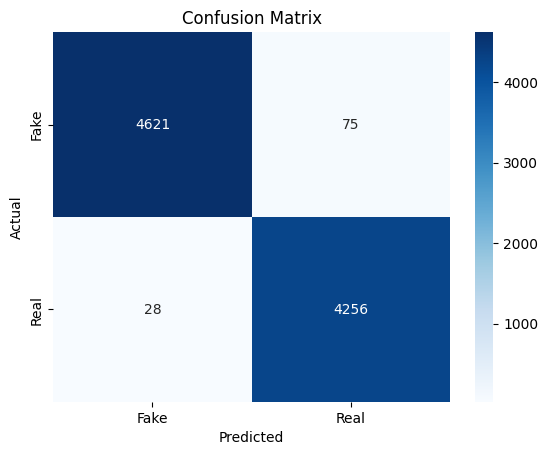

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Prediction function
def predict_news(news):
    news_vec = vectorizer.transform([news])
    pred = model.predict(news_vec)[0]
    return "Real" if pred == 1 else "Fake"

In [ ]:
# Test prediction
sample_news = "NASA has announced a new mission to Mars, launching next year with international collaboration."
print("Sample news:", sample_news)
print("Prediction:", predict_news(sample_news))

Sample news: NASA has announced a new mission to Mars, launching next year with international collaboration.
Prediction: Real
